#### Exploratory Data Analysis 

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
df= pd.read_csv("sample_data_set_2 - Sheet1 (1).csv",sep=",")
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


In [230]:
print(df.info()) # Info about Data
print(df.dtypes) #Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48293 entries, 0 to 48292
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          48293 non-null  object 
 1   App           48270 non-null  object 
 2   Ad Group      44300 non-null  object 
 3   State         48293 non-null  object 
 4   Revenue       48293 non-null  float64
 5   Ad Requests   48293 non-null  int64  
 6   Ad Responses  48293 non-null  int64  
 7   Fill Rate     48293 non-null  object 
 8   Impressions   48293 non-null  int64  
 9   Render Rate   48293 non-null  object 
 10  1st Clicks    48293 non-null  int64  
 11  2nd Clicks    48293 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 4.4+ MB
None
Date             object
App              object
Ad Group         object
State            object
Revenue         float64
Ad Requests       int64
Ad Responses      int64
Fill Rate        object
Impressions       int64
Render

In [231]:
print("Missing Values In Dataset: ", df.isnull().sum()) 
print("Total Missing Values in dataset: ",df.isnull().sum().sum())
print("Percentage of Missing Values in each Column:", df.isnull().sum()/len(df))

Missing Values In Dataset:  Date               0
App               23
Ad Group        3993
State              0
Revenue            0
Ad Requests        0
Ad Responses       0
Fill Rate          0
Impressions        0
Render Rate        0
1st Clicks         0
2nd Clicks         0
dtype: int64
Total Missing Values in dataset:  4016
Percentage of Missing Values in each Column: Date            0.000000
App             0.000476
Ad Group        0.082683
State           0.000000
Revenue         0.000000
Ad Requests     0.000000
Ad Responses    0.000000
Fill Rate       0.000000
Impressions     0.000000
Render Rate     0.000000
1st Clicks      0.000000
2nd Clicks      0.000000
dtype: float64


#### Only 8 % of data is missing. So, Dropping them

In [232]:
df = df.dropna()

In [233]:
df.shape ### Now, we have 44277 Rows with 12 Columns

(44277, 12)

In [234]:
df['Revenue'].value_counts()/len(df)

0.00    0.868261
0.01    0.033787
0.02    0.013732
0.03    0.007995
0.04    0.005962
          ...   
9.11    0.000023
2.42    0.000023
3.14    0.000023
6.54    0.000023
7.98    0.000023
Name: Revenue, Length: 364, dtype: float64

#### Around 86% of data has 0 or No Revenue.

In [235]:
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


#### 1. Top 10 Apps based on Revenue

<AxesSubplot:title={'center':'Revenue vs APP'}, ylabel='App'>

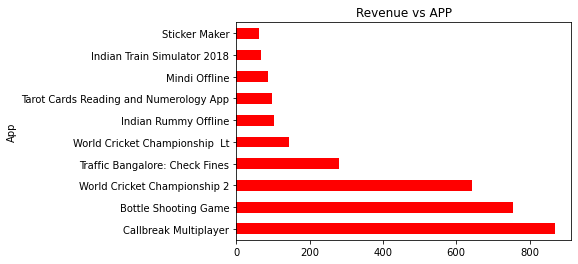

In [288]:
df.groupby(['App'])['Revenue'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "Revenue vs APP", color = "red")

In [237]:
df.groupby(['App'])['Revenue'].sum().sort_values(ascending = False)[:10]

App
Callbreak Multiplayer                     869.40
Bottle Shooting Game                      753.89
World Cricket Championship 2              643.44
Traffic Bangalore: Check Fines            280.33
World Cricket Championship  Lt            145.27
Indian Rummy Offline                      104.28
Tarot Cards Reading and Numerology App     98.86
Mindi Offline                              87.34
Indian Train Simulator 2018                68.51
Sticker Maker                              61.95
Name: Revenue, dtype: float64

#### CallBreak Multiplayer App has made the highest Revenue 

#### These are the top 10 Apps wrt Revenue. 7 out of these 10 Apps, were Games

#### Rest of the apps are to check fines (Traffic Bangalore), Numerology App, & Sticker Maker

#### 2. Top 10 Ad Groups based on Revenue

<AxesSubplot:title={'center':'Revenue Vs Ad Group'}, ylabel='Ad Group'>

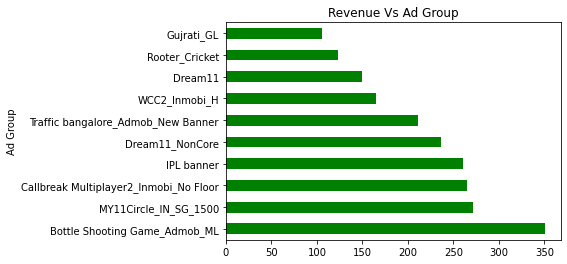

In [238]:
df.groupby(['Ad Group'])['Revenue'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", color = "green", title = "Revenue Vs Ad Group")

#### Ad Group "Bottle Shooting Game_admob_ML" has highest revenue of 350 followed by My11Circle, etc

In [239]:
df.groupby(['App', 'Ad Group'])['Revenue'].sum().sort_values(ascending = False)[:10]

App                                     Ad Group                              
Bottle Shooting Game                    Bottle Shooting Game_Admob_ML             350.40
Callbreak Multiplayer                   Callbreak Multiplayer2_Inmobi_No Floor    264.99
Traffic Bangalore: Check Fines          Traffic bangalore_Admob_New Banner        211.05
World Cricket Championship 2            WCC2_Inmobi_H                             164.40
Callbreak Multiplayer                   Dream11_NonCore                           162.26
                                        MY11Circle_IN_SG_1500                     132.80
                                        IPL banner                                130.68
Tarot Cards Reading and Numerology App  4700_Tarot Card_AdMob_Banner               98.86
World Cricket Championship 2            WCC2_Admob_GG_0.50                         95.18
Bottle Shooting Game                    Dream11                                    81.13
Name: Revenue, dtype: float64

#### Revenue Achieved by Specific App & Ad Group

<AxesSubplot:title={'center':'Revenue Achieved by Specific App & Ad Group'}, ylabel='App,Ad Group'>

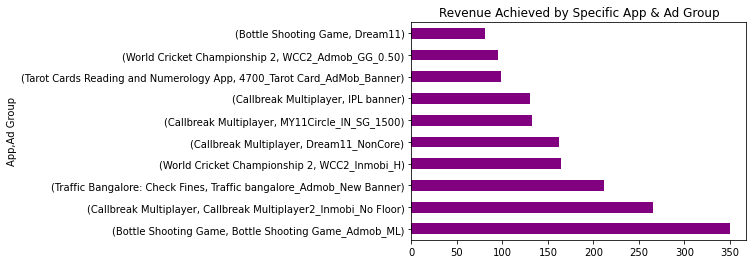

In [240]:
df.groupby(['App', 'Ad Group'])['Revenue'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", color = "purple", title = "Revenue Achieved by Specific App & Ad Group")

#### 3. Revenue Achieved by Apps Statewise

<AxesSubplot:title={'center':'Revenue Achieved by Specific App & State'}, ylabel='App,State'>

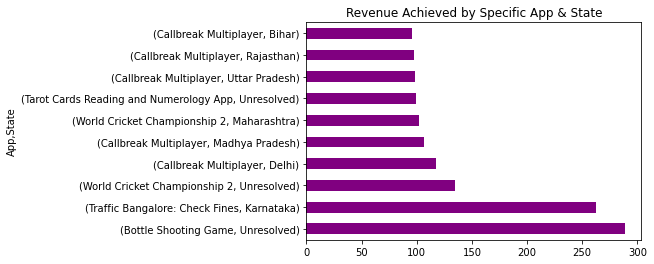

In [241]:
df.groupby(['App', 'State'])['Revenue'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", color = "purple", title = "Revenue Achieved by Specific App & State")

In [242]:
df.groupby(['App', 'State'])['Revenue'].sum().sort_values(ascending = False)[:10]

App                                     State         
Bottle Shooting Game                    Unresolved        288.97
Traffic Bangalore: Check Fines          Karnataka         262.52
World Cricket Championship 2            Unresolved        134.46
Callbreak Multiplayer                   Delhi             117.49
                                        Madhya Pradesh    106.09
World Cricket Championship 2            Maharashtra       101.70
Tarot Cards Reading and Numerology App  Unresolved         98.83
Callbreak Multiplayer                   Uttar Pradesh      98.30
                                        Rajasthan          97.29
                                        Bihar              95.82
Name: Revenue, dtype: float64

<AxesSubplot:title={'center':'Revenue Achieved by Specific App, Ad Group & State'}, ylabel='App,Ad Group,State'>

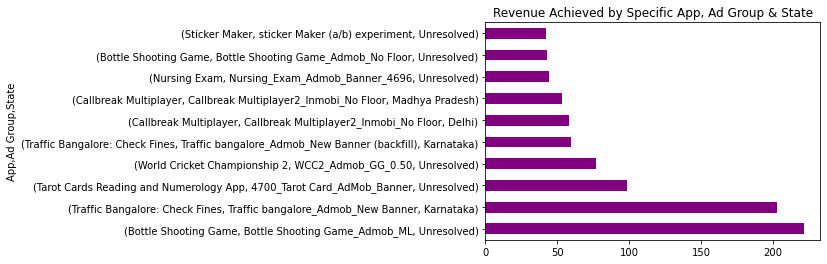

In [264]:
df.groupby(['App','Ad Group', 'State'])['Revenue'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", color = "purple", title = "Revenue Achieved by Specific App, Ad Group & State")

#### Bottle Shooting Game has achieved overall highest revenue of 288.97 interestingly it's not from india
#### Traffic Bangalore App which is from Karnataka has achieved highest revenue of US $262.52 in India. 
#### These Top 10 Revenue Achieved by Apps statewise has mostly Gaming Apps, a Traffic App and Numerology App.
#### Tells, how gaming industry is booming worldwide.

In [244]:
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


#### 4. 1st Clicks, 2nd Clicks based on APPs

#### A. Number of 1st Clicks App wise

<AxesSubplot:title={'center':'No. of 1st Clicks App wise'}, ylabel='App'>

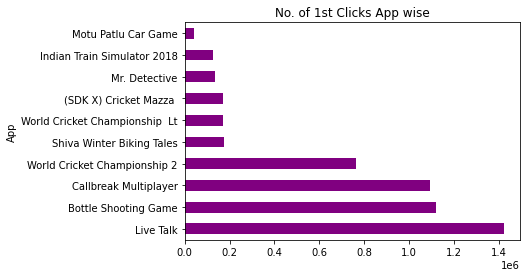

In [245]:
df.groupby(['App'])['1st Clicks'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", color = "purple", title = "No. of 1st Clicks App wise")

#### Live Talk App has most no.of 1st Clicks followed by Bottle Shooting Game, Callbreak multiplayer, and so on

#### B. Number of 2nd Clicks App wise

<AxesSubplot:title={'center':'No. of 2nd Clicks App wise'}, ylabel='App'>

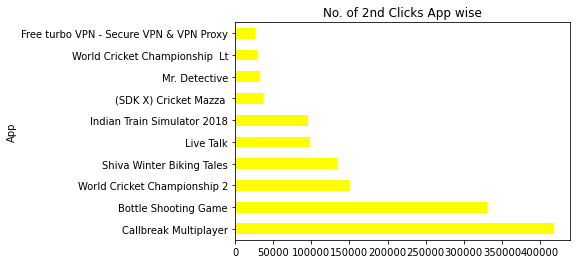

In [246]:
df.groupby(['App'])['2nd Clicks'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", color = "yellow", title = "No. of 2nd Clicks App wise")

#### Callbreak Multiplayer has highest no. of 2nd Clicks followed by Bottle Shooting Game and So on. 

#### C. Number of 1st Clicks based on App & Ad Group

<AxesSubplot:title={'center':'No. of 1st Clicks App, Ad Group wise'}, ylabel='App,Ad Group'>

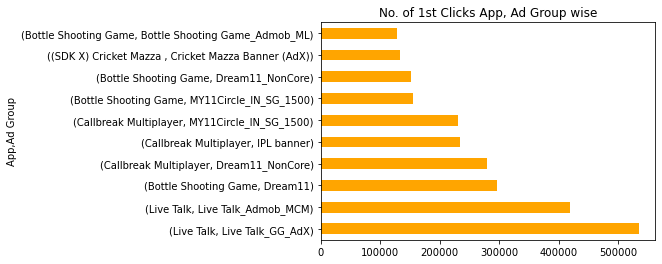

In [247]:
df.groupby(['App', 'Ad Group'])['1st Clicks'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", color = "orange", title = "No. of 1st Clicks App, Ad Group wise", )

#### D. Number of 2nd Clicks based on App & Ad Group

<AxesSubplot:title={'center':'No. of 2nd Clicks App & Ad Group wise'}, ylabel='App,Ad Group'>

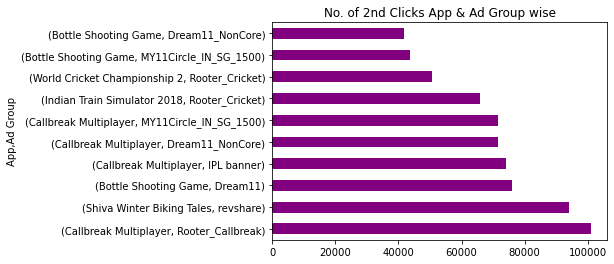

In [248]:
df.groupby(['App', 'Ad Group'])['2nd Clicks'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", color = "purple", title = "No. of 2nd Clicks App & Ad Group wise")

#### In Summary related to 1st Clicks & 2nd Clicks, we can say most of the Clicks were of Games and Live Chat Apps. Except few are other non-gaming apps

In [249]:
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


#### 5. Impressions
#### A. Top 10 Impressions App wise

<AxesSubplot:title={'center':'App wise Impressions'}, ylabel='App'>

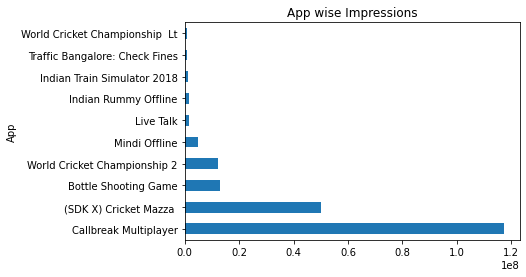

In [250]:
df.groupby(['App'])['Impressions'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "App wise Impressions")

#### Callbreak Multiplayer Application has highest number of Impressions followed by Cricket Mazza

#### B. Top 10 Impressions Ad Group wise

<AxesSubplot:title={'center':'Ad Group wise Impressions'}, ylabel='Ad Group'>

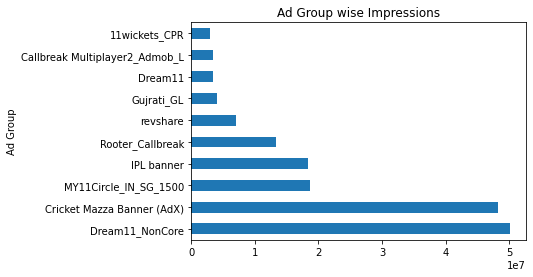

In [251]:
df.groupby(['Ad Group'])['Impressions'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "Ad Group wise Impressions")

#### Dream11_noncore Ad has highest Impressions followed by Cricket Mazza and So on

#### C. Top 10 Impressions App & Ad Group wise

<AxesSubplot:title={'center':'App, Ad Group wise Impressions'}, ylabel='App,Ad Group'>

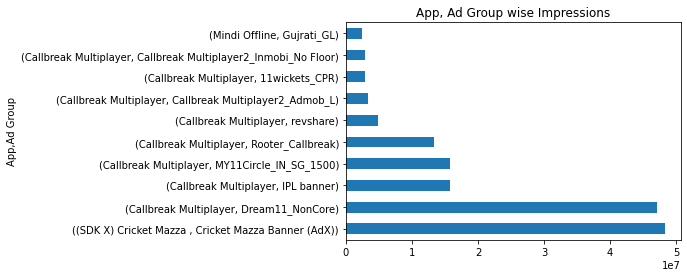

In [252]:
df.groupby(['App', 'Ad Group'])['Impressions'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "App, Ad Group wise Impressions")

#### Here, if we can see Cricket Mazza App has highest Impressions followed by Callbreak Multiplayer in terms of App, Ad Group

#### Interesting Insight, here is Dream11_NonCore, IPL Banner, My11 Circle Ads, 11wickets all are Fantasy Games appearing Callbreak Multiplayer which is a card game. These Ads are appearing on users screen to Bet or use these Apps to get new users. 

#### 6. Ad Requests & Ad Responses
#### A. No. of Ad Requests made by App Statewise

<AxesSubplot:title={'center':'No. of Ad Requests by an App Statewise'}, ylabel='State,App'>

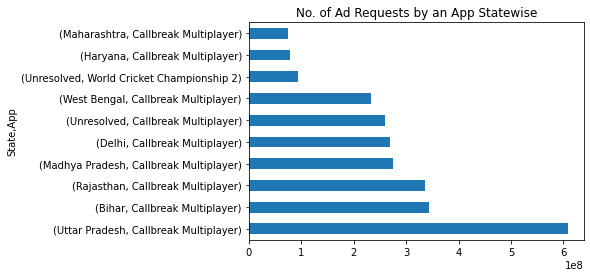

In [265]:
df.groupby(['State', 'App'])['Ad Requests'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "No. of Ad Requests by an App Statewise")

#### Callbreak Multiplayer App has requested most no. of Ad Requests from state UP followed by Bihar and so on.
#### Amongst these top 10 Apps, Majority of Ad Requests has made by Callbreak Multiplayer App from most of Northern & Eastern Part of India

#### B. No. of Ad Responses made by App Statewise

<AxesSubplot:title={'center':'No. of Ad Responses by an App Statewise'}, ylabel='State,App'>

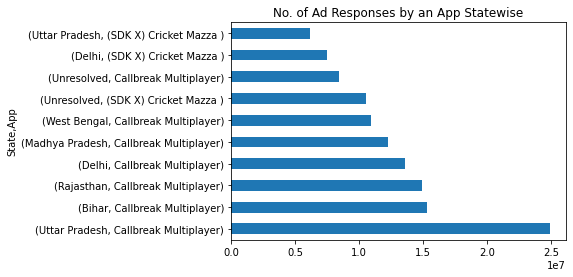

In [266]:
df.groupby(['State', 'App'])['Ad Responses'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "No. of Ad Responses by an App Statewise")

#### After requesting for an Ad, Most No. of Ad Responses is from Callbreak Multiplayer of state UP

In [255]:
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks
0,08 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0
1,08 Sep 2020,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2
2,08 Sep 2020,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2
3,08 Sep 2020,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2
4,06 Sep 2020,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0


#### 7. Analysing Dates

In [256]:
print("Unique Dates from Dataset: ", df['Date'].unique())
print('Period of Dates Present in Dataset, Days', df['Date'].nunique())
print("Count of Dates present in Dataset: ", df['Date'].value_counts())

Unique Dates from Dataset:  ['08 Sep 2020' '06 Sep 2020' '12 Sep 2020' '11 Sep 2020' '10 Sep 2020'
 '09 Sep 2020' '07 Sep 2020']
Period of Dates Present in Dataset, Days 7
Count of Dates present in Dataset:  10 Sep 2020    7098
11 Sep 2020    6831
09 Sep 2020    6647
08 Sep 2020    6339
12 Sep 2020    6000
06 Sep 2020    5692
07 Sep 2020    5670
Name: Date, dtype: int64


#### The Dataset is from 06 Sept 2020 to 12 Sept 2020.

In [267]:
#### Extracting the Days from Date
from datetime import datetime

In [258]:
df['Date'] = pd.to_datetime(df['Date'])

In [259]:
df['Day'] = df['Date'].dt.day

In [260]:
df['DayName'] = df['Date'].dt.day_name()

In [270]:
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks,Day,DayName
0,2020-09-08,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0,8,Tuesday
1,2020-09-08,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2,8,Tuesday
2,2020-09-08,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2,8,Tuesday
3,2020-09-08,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2,8,Tuesday
4,2020-09-06,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0,6,Sunday


In [273]:
#### Here, Fill_Rate Column is modified

In [274]:
df['Fill_Rate'] = df['Ad Responses']/df['Ad Requests']

In [275]:
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks,Day,DayName,Fill_Rate
0,2020-09-08,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0,8,Tuesday,0.998455
1,2020-09-08,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2,8,Tuesday,0.000030
2,2020-09-08,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2,8,Tuesday,0.000024
3,2020-09-08,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2,8,Tuesday,0.000028
4,2020-09-06,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0,6,Sunday,0.998782


In [280]:
df1 = df.copy()

In [281]:
df1.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks,Day,DayName,Fill_Rate
0,2020-09-08,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0,8,Tuesday,0.998455
1,2020-09-08,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2,8,Tuesday,0.000030
2,2020-09-08,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2,8,Tuesday,0.000024
3,2020-09-08,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2,8,Tuesday,0.000028
4,2020-09-06,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0,6,Sunday,0.998782


#### Outliers 

<AxesSubplot:xlabel='Impressions'>

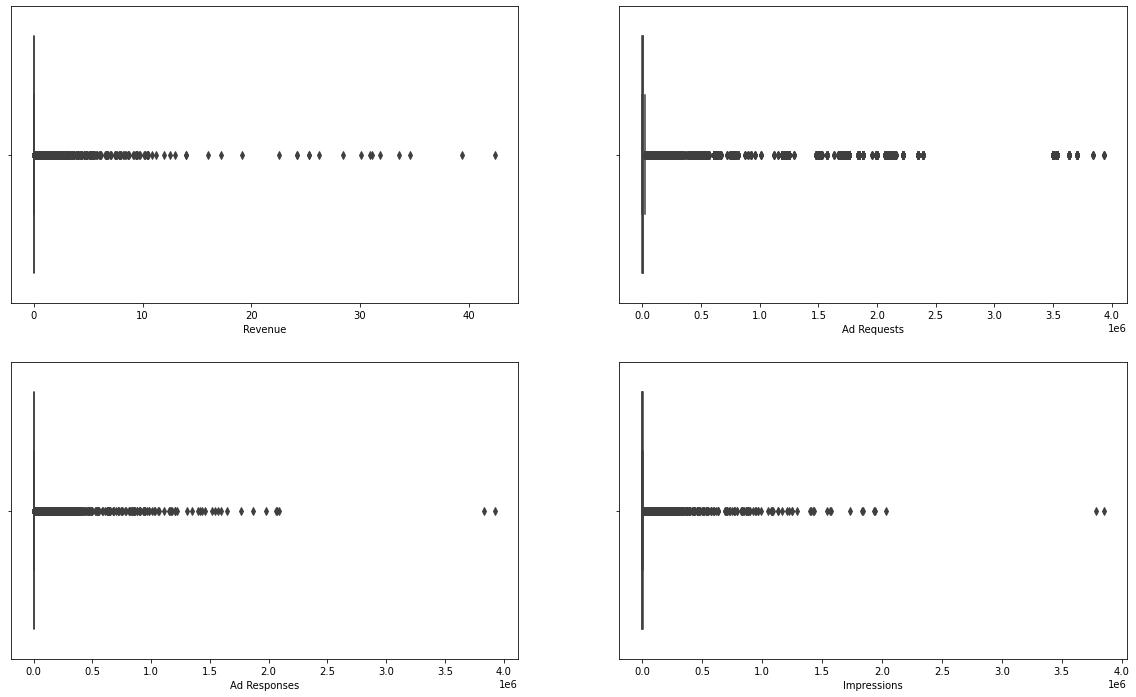

In [286]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(x='Revenue',data = df, ax=axarr[0][0])
sns.boxplot(x='Ad Requests', data = df, ax=axarr[0][1])
sns.boxplot(x='Ad Responses',data = df, ax=axarr[1][0])
sns.boxplot(x='Impressions', data = df, ax=axarr[1][1])

#### Revenue, Ad Requests, Ad Responses, Impressions made by App Daywise

<AxesSubplot:title={'center':'Revenue made by an App Daywise'}, ylabel='App,DayName'>

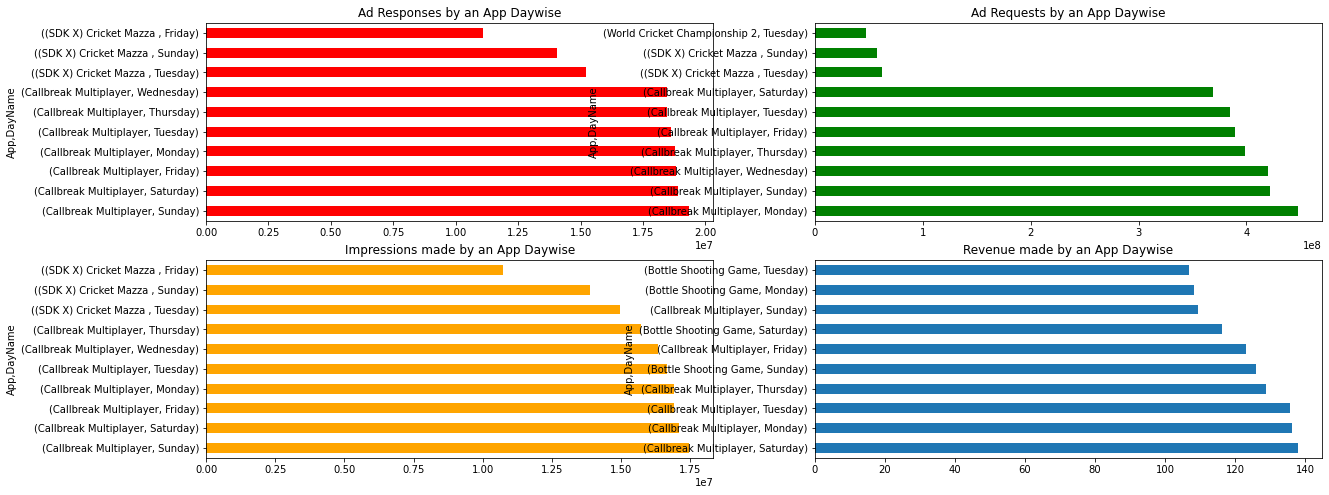

In [302]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 8))
df.groupby(['App', 'DayName'])['Ad Responses'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "Ad Responses by an App Daywise", ax=axarr[0][0], color = "red")
df.groupby(['App', 'DayName'])['Ad Requests'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "Ad Requests by an App Daywise", ax=axarr[0][1], color = "green")
df.groupby(['App', 'DayName'])['Impressions'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "Impressions made by an App Daywise", ax=axarr[1][0], color = "orange")
df.groupby(['App', 'DayName'])['Revenue'].sum().sort_values(ascending = False)[:10].plot(kind = "barh", title = "Revenue made by an App Daywise", ax=axarr[1][1])

#### Callbreak Multiplayer game has outplayed amongst other Apps and above plot shows the Revenue, Impressions, Ad Responses, Ad Requests Day-wise

#### Most No. of Impressions are displayed on Weekends i.e, Sunday & Saturday

#### Highest Revenue is achieved by Callbreak Multiplayer on Saturday.

In [305]:
df.head()

,Date,App,Ad Group,State,Revenue,Ad Requests,Ad Responses,Fill Rate,Impressions,Render Rate,1st Clicks,2nd Clicks,Day,DayName,Fill_Rate
0,2020-09-08,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3932330,3926253,99.9%,3849749,98.1%,10199,0,8,Tuesday,0.998455
1,2020-09-08,(SDK X) Cricket Mazza,320x50,Unresolved,0.0,3932330,119,99.9%,118,99.2%,2,2,8,Tuesday,0.000030
2,2020-09-08,(SDK X) Cricket Mazza,Dream11_320x50,Unresolved,0.0,3932330,96,99.9%,93,96.9%,2,2,8,Tuesday,0.000024
3,2020-09-08,(SDK X) Cricket Mazza,My11_320x50,Unresolved,0.0,3932330,111,99.9%,110,99.1%,2,2,8,Tuesday,0.000028
4,2020-09-06,(SDK X) Cricket Mazza,Cricket Mazza Banner (AdX),Unresolved,0.0,3839002,3834328,99.9%,3785127,98.7%,9492,0,6,Sunday,0.998782


#### Revenue Day-wise

In [317]:
df.groupby(['DayName'])['Revenue'].sum()

DayName
Friday       486.25
Monday       495.81
Saturday     525.14
Sunday       473.80
Thursday     502.80
Tuesday      513.04
Wednesday    476.37
Name: Revenue, dtype: float64

<AxesSubplot:xlabel='DayName'>

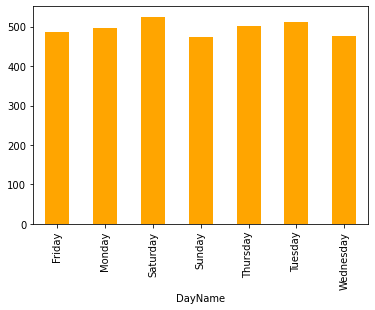

In [316]:
df.groupby(['DayName'])['Revenue'].sum().plot(kind = "bar", color = "orange")

#### <----Thank You---->